# DIP

In [1]:
(ns scenic-swamp
   (:require
     [opencv4.utils :as u]
     [opencv4.core :refer :all]))

nil

## enhance contrast

Enhancing contrast is done using the *equalize-hist* function. 

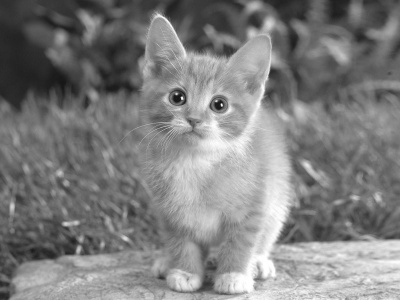

In [7]:
(def image 
  (->
  "resources/images/cat.jpg"
  (imread IMREAD_REDUCED_GRAYSCALE_4)))

(u/>>> image)

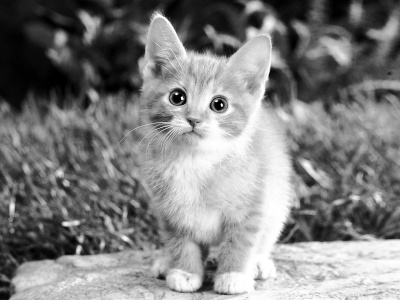

In [8]:
(-> image
 (equalize-hist!)
 (u/>>>))

## ENHANCE BRIGHTNESS

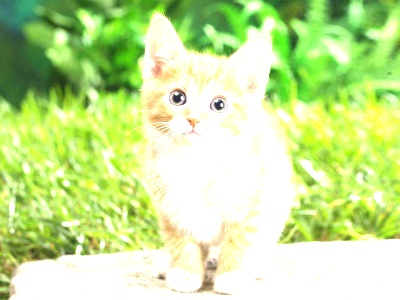

In [10]:
(->
  (imread "resources/images/cat.jpg" IMREAD_REDUCED_COLOR_4)
  ; rtype (-1 to match src) alpha (multiply by) beta (then add)
  (convert-to! -1 2 0)
  (u/>>>))

## ENHANCE SHARPNESS

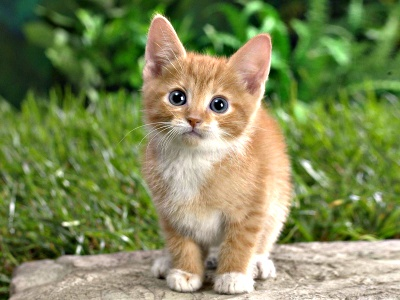

In [20]:
(def neko (imread "resources/images/cat.jpg" IMREAD_REDUCED_COLOR_4))
(gaussian-blur neko dest (new-size 0 0) 10)
; this adds two mats, each with a weighted value,
; gamma(here 0) is then added
(add-weighted neko 1.5 dest -0.5 0 dest)
(u/>>> dest)

## merge two images

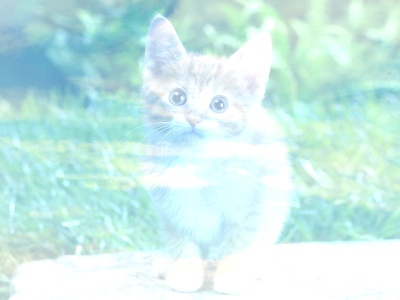

In [38]:
(def n1 (imread "resources/images/cat.jpg" IMREAD_REDUCED_COLOR_4))
(def n2 (-> "resources/images/cat3.png"
            (imread IMREAD_REDUCED_COLOR_4)
            (resize! (size n1))))

(def dest (u/mat-from n1))
(add-weighted n1 0.5 n2 0.8 0 dest)
(u/>>> dest)

## add border reflect

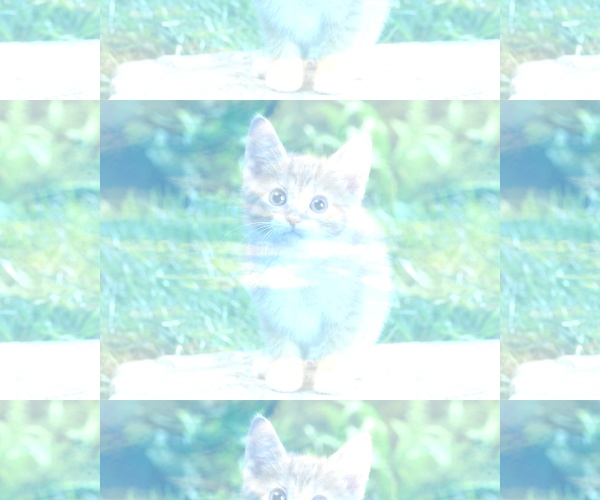

In [39]:
(->
  (clone dest)
  (copy-make-border!
    100
    100
    100
    100
    BORDER_WRAP)
  (u/>>> ))

## ERODE

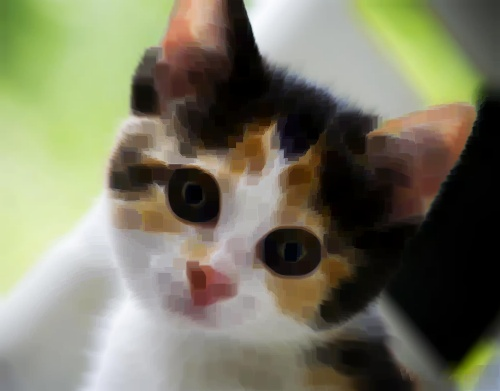

In [44]:
(def erosion-size 5)
(->
  (imread "resources/images/cat2.png" IMREAD_REDUCED_COLOR_2)
  (erode!
    (get-structuring-element
      MORPH_RECT
      (new-size (inc (* 2 erosion-size)) (inc (* 2 erosion-size)))))
  (u/>>>))

## dilate

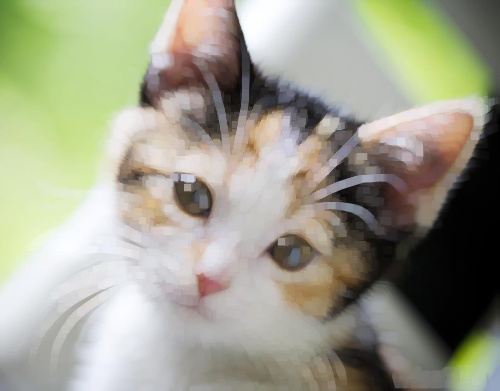

In [46]:
(def dilation-size 3)
(->
  (imread "resources/images/cat2.png" IMREAD_REDUCED_COLOR_2)
  (dilate!
    (get-structuring-element
      MORPH_RECT
      (new-size (inc (* 2 dilation-size)) (inc (* 2 dilation-size)))))
  (u/>>>))